In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F

from tensorboard.backend.event_processing import event_accumulator

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os

import project_path

# plt.style.use('seaborn-darkgrid')

In [2]:
def get_vals_from_tensorboard(path, tag):
    ea = event_accumulator.EventAccumulator(path,
                                            size_guidance={ # see below regarding this argument
                                                event_accumulator.COMPRESSED_HISTOGRAMS: 500,
                                                event_accumulator.IMAGES: 4,
                                                event_accumulator.AUDIO: 4,
                                                event_accumulator.SCALARS: 0,
                                                event_accumulator.HISTOGRAMS: 1,
                                            })
    ea.Reload()
    w_times, step_nums, vals = zip(*ea.Scalars(tag))
    return vals

In [3]:
outputdir = os.path.expanduser("~/data/plots_of_the_day/lpl/fig_deep_networks")
os.makedirs(outputdir, exist_ok=True)

# STL-10

In [4]:
ACC_TAG = 'Performance/linear_readout_acc'
DIMENSION_TAG = 'Manifold Metrics/mean_class_dim'
logdir = os.path.expanduser("~/data/lpl/stl10")
logdir_no_pooling = os.path.expanduser("~/data/lpl/stl10_downsampled")

In [5]:
paths = {}

dims = {}
accs = {}
lens = {}

In [6]:
paths['lpl'] = 'run_'
paths['lpl_e2e'] = 'run_'

paths['pred_off'] = 'pred_off_'
paths['pred_off_e2e'] = 'pred_off_'

paths['hebb_off'] = 'hebb_off_'
paths['hebb_off_e2e'] = 'hebb_off_'

paths['decorr_off'] = 'decorr_off_'
paths['decorr_off_e2e'] = 'decorr_off_'

In [7]:
for key in paths:
    accs[key] = []
    lens[key] = []
    dims[key] = []

In [8]:
num_runs = 4

In [9]:
for key in paths:
    for i in range(num_runs):
        if 'e2e' in key:
            path = os.path.join(logdir, paths[key] + str(i+1), 'lpl_end-to-end')
        else:
            path = os.path.join(logdir, paths[key] + str(i+1), 'lpl')
        print(path)
        
        vals = get_vals_from_tensorboard(path, ACC_TAG) 
        lens[key].append(len(vals))
        accs[key].append(vals[-1])
        
        dims[key].append(get_vals_from_tensorboard(path, DIMENSION_TAG)[-1])

/home_fmi/01/srinmanu/data/lpl/stl10/run_1/lpl
/home_fmi/01/srinmanu/data/lpl/stl10/run_2/lpl
/home_fmi/01/srinmanu/data/lpl/stl10/run_3/lpl
/home_fmi/01/srinmanu/data/lpl/stl10/run_4/lpl
/home_fmi/01/srinmanu/data/lpl/stl10/run_1/lpl_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/run_2/lpl_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/run_3/lpl_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/run_4/lpl_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/pred_off_1/lpl
/home_fmi/01/srinmanu/data/lpl/stl10/pred_off_2/lpl
/home_fmi/01/srinmanu/data/lpl/stl10/pred_off_3/lpl
/home_fmi/01/srinmanu/data/lpl/stl10/pred_off_4/lpl
/home_fmi/01/srinmanu/data/lpl/stl10/pred_off_1/lpl_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/pred_off_2/lpl_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/pred_off_3/lpl_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/pred_off_4/lpl_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/hebb_off_1/lpl
/home_fmi/01/srinmanu/data/lpl/stl10/hebb_off_2/lpl
/home_fmi/01/sri

In [10]:
mean_accs = {}
err_accs = {}

mean_dims = {}
err_dims = {}

for key in paths:
    print(key)
    print(np.mean(accs[key]))
    mean_accs[key] = np.mean(accs[key])
    
    if num_runs>1:
        print(np.std(accs[key]))
        err_accs[key] = np.std(accs[key])/np.sqrt(num_runs)
    else:
        err_accs[key] = 0
    
    print('')
    print(np.mean(dims[key]))
    mean_dims[key] = np.mean(dims[key])
    
    if num_runs>1:
        print(np.std(dims[key]))
        err_dims[key] = np.std(dims[key])/np.sqrt(num_runs)
    else:
        err_dims[key] = 0
    
    print('')

lpl
0.6317500025033951
0.005680975520038761

14.891985177993774
0.23905057973475474

lpl_e2e
0.7251875102519989
0.0009416604076317959

11.505983591079712
0.17015835996435566

pred_off
0.2696562558412552
0.0035004183495933074

46.77215385437012
2.98733078425932

pred_off_e2e
0.19984375312924385
0.01560107291242148

111.08818817138672
21.61143956299079

hebb_off
0.10000000149011612
0.0

1.000000238418579
0.0

hebb_off_e2e
0.10000000149011612
0.0

1.0000001788139343
5.960464477539063e-08

decorr_off
0.21725000068545341
0.008133652615283146

1.0879224240779877
0.034743781318290375

decorr_off_e2e
0.21568749845027924
0.041482721051329594

1.001764178276062
0.0025554421523415662



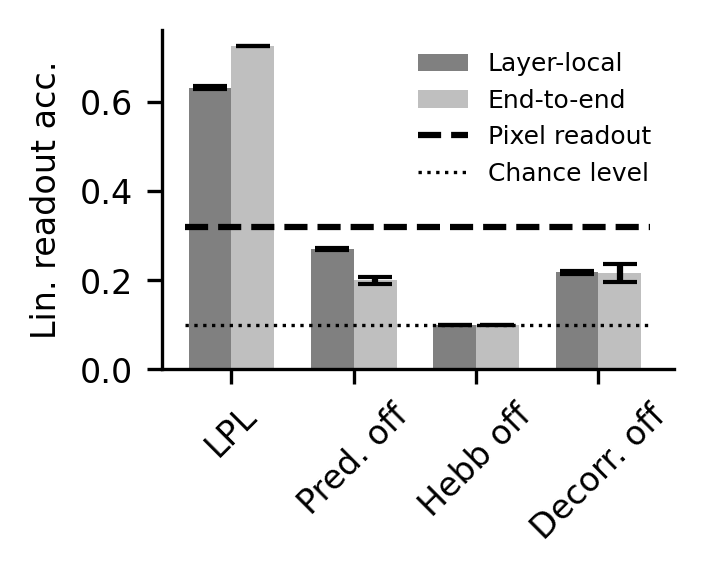

In [34]:
plt.figure(figsize=(2.2, 1.5), dpi=300)

barWidth = 0.35

r1 = np.arange(4)
r2 = [x + barWidth for x in r1]

pixel_readout_acc = 0.32 # See notebook 3b

plt.bar(r1, [mean_accs['lpl'], mean_accs['pred_off'], mean_accs['hebb_off'], mean_accs['decorr_off']], color ='gray', width = barWidth, yerr = [err_accs['lpl'], err_accs['pred_off'], err_accs['hebb_off'], err_accs['decorr_off']], label='Layer-local', capsize=4)
plt.bar(r2, [mean_accs['lpl_e2e'], mean_accs['pred_off_e2e'], mean_accs['hebb_off_e2e'], mean_accs['decorr_off_e2e']], color ='gray', width = barWidth, yerr = [err_accs['lpl_e2e'], err_accs['pred_off_e2e'], err_accs['hebb_off_e2e'], err_accs['decorr_off_e2e']], label='End-to-end', alpha=0.5, capsize=4)
plt.xticks([r + 0.5*barWidth for r in range(len(r1))], ['LPL', 'Pred. off', 'Hebb off', 'Decorr. off'], fontsize=8)
plt.hlines(0.1, -0.2, 3.6, color='k', linewidth=0.8, linestyle='dotted', label='Chance level')
plt.hlines(pixel_readout_acc, -0.2, 3.6, color='k', linestyle='--', label='Pixel readout')
# plt.hlines(mean_accs['supervised'], -0.2, 2.6, color='k', linestyle='-.', label='Supervised')
plt.ylabel('Lin. readout acc.', fontsize=8)

handles,labels = plt.gca().get_legend_handles_labels()
handles = [handles[2], handles[3], handles[1], handles[0]]
labels = [labels[2], labels[3], labels[1], labels[0]]
lgd = plt.legend(handles, labels, frameon=False, fontsize=6)

plt.xticks(rotation=45, fontsize=8)
# plt.tight_layout()
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
sns.despine()
plt.savefig(os.path.join(outputdir,'deep_net_acc_stl.pdf'), bbox_inches='tight')

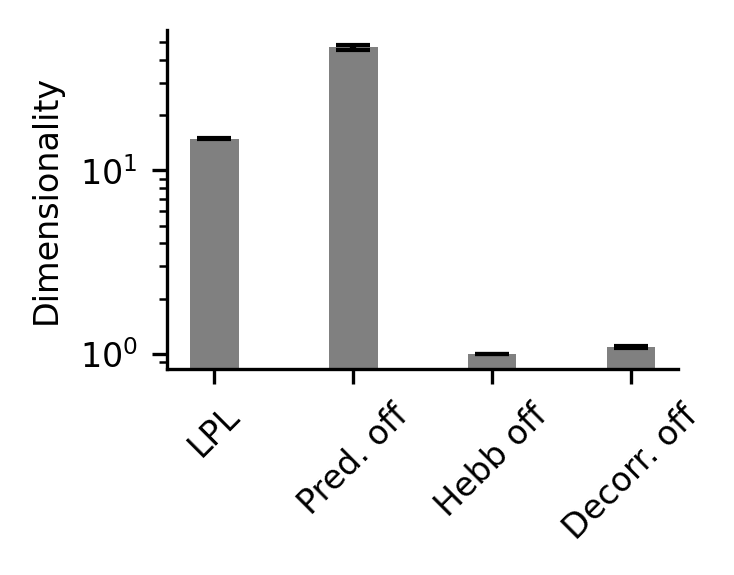

In [12]:
plt.figure(figsize=(2.2, 1.5), dpi=300)

barWidth = 0.35

r1 = np.arange(4)
r2 = [x + barWidth for x in r1]

plt.bar(r1, [mean_dims['lpl'], mean_dims['pred_off'], mean_dims['hebb_off'], mean_dims['decorr_off']], color ='gray', width = barWidth, yerr = [err_dims['lpl'], err_dims['pred_off'], err_dims['hebb_off'], err_dims['decorr_off']], label='Layer-local', capsize=4)
plt.xticks(r1, ['LPL', 'Pred. off', 'Hebb off', 'Decorr. off'], fontsize=8)
plt.ylabel('Dimensionality', fontsize=8)
plt.xticks(rotation=45, fontsize=8)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
ax.set_yscale('log')
sns.despine()
plt.savefig(os.path.join(outputdir,'deep_net_dim_stl.pdf'), bbox_inches='tight')

In [35]:
mean_dims

{'lpl': 14.891985177993774,
 'lpl_e2e': 11.505983591079712,
 'pred_off': 46.77215385437012,
 'pred_off_e2e': 111.08818817138672,
 'hebb_off': 1.000000238418579,
 'hebb_off_e2e': 1.0000001788139343,
 'decorr_off': 1.0879224240779877,
 'decorr_off_e2e': 1.001764178276062,
 'supervised': 9.060387134552002,
 'supervised_e2e': 7.653300523757935,
 'neg_samples': 11.012286186218262,
 'neg_samples_e2e': 13.667211055755615,
 'no_bias': 13.4554443359375,
 'no_pooling': 3.2786386609077454,
 'no_pooling_downsampled': 13.856889963150024}

## Comparison with other methods

In [13]:
paths_baselines = {}
model_names = {}

dims_baselines = {}
accs_baselines = {}
lens_baselines = {}

In [14]:
paths_baselines['supervised'] = 'run_'
model_names['supervised'] = 'supervised'
paths_baselines['supervised_e2e'] = 'run_'
model_names['supervised_e2e'] = 'supervised_end-to-end'

paths_baselines['neg_samples'] = 'run_'
model_names['neg_samples'] = 'negative_samples_mlp-projection'
paths_baselines['neg_samples_e2e'] = 'run_'
model_names['neg_samples_e2e'] = 'negative_samples_mlp-projection_end-to-end'

paths_baselines['no_bias'] = 'bias_free'
# paths_baselines['stale'] = 'stale_'
paths_baselines['no_pooling'] = 'run_'
paths_baselines['no_pooling_downsampled'] = 'run_'

model_names['no_bias'] = 'lpl'
# model_names['stale'] = 'lpl'
model_names['no_pooling'] = 'lpl_no-pooling'
model_names['no_pooling_downsampled'] = 'lpl_no-pooling'

In [15]:
for key in paths_baselines:
    accs[key] = []
    lens[key] = []
    dims[key] = []

In [16]:
for key in paths_baselines:
    for i in range(num_runs):
        if 'downsampled' in key:
            path = os.path.join(logdir_no_pooling, paths_baselines[key] + str(i+1), model_names[key])
        elif key=='no_bias':
            path = os.path.join(logdir, paths_baselines[key], model_names[key])
        else:
            path = os.path.join(logdir, paths_baselines[key] + str(i+1), model_names[key])
        print(path)
        
        vals = get_vals_from_tensorboard(path, ACC_TAG) 
        lens[key].append(len(vals))
        accs[key].append(vals[-1])
        dims[key].append(get_vals_from_tensorboard(path, DIMENSION_TAG)[-1])

/home_fmi/01/srinmanu/data/lpl/stl10/run_1/supervised
/home_fmi/01/srinmanu/data/lpl/stl10/run_2/supervised
/home_fmi/01/srinmanu/data/lpl/stl10/run_3/supervised
/home_fmi/01/srinmanu/data/lpl/stl10/run_4/supervised
/home_fmi/01/srinmanu/data/lpl/stl10/run_1/supervised_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/run_2/supervised_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/run_3/supervised_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/run_4/supervised_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/run_1/negative_samples_mlp-projection
/home_fmi/01/srinmanu/data/lpl/stl10/run_2/negative_samples_mlp-projection
/home_fmi/01/srinmanu/data/lpl/stl10/run_3/negative_samples_mlp-projection
/home_fmi/01/srinmanu/data/lpl/stl10/run_4/negative_samples_mlp-projection
/home_fmi/01/srinmanu/data/lpl/stl10/run_1/negative_samples_mlp-projection_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/run_2/negative_samples_mlp-projection_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/run_3/negative_

In [17]:
for key in paths_baselines:
    print(key)
    print(np.mean(accs[key]))
    mean_accs[key] = np.mean(accs[key])
    
    if num_runs>1:
        print(np.std(accs[key]))
        err_accs[key] = np.std(accs[key])/np.sqrt(num_runs)
    else:
        err_accs[key] = 0
    
    print('')
    print(np.mean(dims[key]))
    mean_dims[key] = np.mean(dims[key])
    
    if num_runs>1:
        print(np.std(dims[key]))
        err_dims[key] = np.std(dims[key])/np.sqrt(num_runs)
    else:
        err_dims[key] = 0
    
    print('')

supervised
0.7080312371253967
0.00532195293943307

9.060387134552002
0.517850112420828

supervised_e2e
0.7781562507152557
0.005411466712514611

7.653300523757935
1.3922694221813134

neg_samples
0.7696249932050705
0.0037468665939827017

11.012286186218262
0.22930673827028283

neg_samples_e2e
0.810062512755394
0.004380795783217981

13.667211055755615
0.39856567969755224

no_bias
0.5871250033378601
0.0

13.4554443359375
0.0

no_pooling
0.29215624928474426
0.03544817356723245

3.2786386609077454
0.2449718973312198

no_pooling_downsampled
0.45250000804662704
0.008095617713064312

13.856889963150024
0.6466970762800388



In [18]:
mean_accs

{'lpl': 0.6317500025033951,
 'lpl_e2e': 0.7251875102519989,
 'pred_off': 0.2696562558412552,
 'pred_off_e2e': 0.19984375312924385,
 'hebb_off': 0.10000000149011612,
 'hebb_off_e2e': 0.10000000149011612,
 'decorr_off': 0.21725000068545341,
 'decorr_off_e2e': 0.21568749845027924,
 'supervised': 0.7080312371253967,
 'supervised_e2e': 0.7781562507152557,
 'neg_samples': 0.7696249932050705,
 'neg_samples_e2e': 0.810062512755394,
 'no_bias': 0.5871250033378601,
 'no_pooling': 0.29215624928474426,
 'no_pooling_downsampled': 0.45250000804662704}

In [19]:
err_accs

{'lpl': 0.0028404877600193804,
 'lpl_e2e': 0.00047083020381589796,
 'pred_off': 0.0017502091747966537,
 'pred_off_e2e': 0.00780053645621074,
 'hebb_off': 0.0,
 'hebb_off_e2e': 0.0,
 'decorr_off': 0.004066826307641573,
 'decorr_off_e2e': 0.020741360525664797,
 'supervised': 0.002660976469716535,
 'supervised_e2e': 0.0027057333562573054,
 'neg_samples': 0.0018734332969913509,
 'neg_samples_e2e': 0.0021903978916089904,
 'no_bias': 0.0,
 'no_pooling': 0.017724086783616224,
 'no_pooling_downsampled': 0.004047808856532156}

# CIFAR-10

In [ ]:
ACC_TAG = 'Performance/linear_readout_acc'
DIMENSION_TAG = 'Manifold Metrics/mean_class_dim'
logdir = os.path.expanduser("~/data/lpl/cifar10")

In [ ]:
paths = {}

dims = {}
accs = {}
lens = {}

In [ ]:
paths['lpl'] = 'run_'
paths['lpl_e2e'] = 'run_'

paths['pred_off'] = 'pred_off_'
paths['pred_off_e2e'] = 'pred_off_'

paths['hebb_off'] = 'hebb_off_'
paths['hebb_off_e2e'] = 'hebb_off_'

paths['decorr_off'] = 'decorr_off_'
paths['decorr_off_e2e'] = 'decorr_off_'

In [ ]:
for key in paths:
    accs[key] = []
    lens[key] = []
    dims[key] = []

In [ ]:
num_runs = 4

In [ ]:
for key in paths:
    for i in range(num_runs):
        if 'e2e' in key:
            path = os.path.join(logdir, paths[key] + str(i+1), 'lpl_end-to-end')
        else:
            path = os.path.join(logdir, paths[key] + str(i+1), 'lpl')
        print(path)
        
        vals = get_vals_from_tensorboard(path, ACC_TAG) 
        lens[key].append(len(vals))
        accs[key].append(vals[-1])
        
        dims[key].append(get_vals_from_tensorboard(path, DIMENSION_TAG)[-1])

/home_fmi/01/srinmanu/data/lpl/stl10/run_1/lpl
/home_fmi/01/srinmanu/data/lpl/stl10/run_2/lpl
/home_fmi/01/srinmanu/data/lpl/stl10/run_3/lpl
/home_fmi/01/srinmanu/data/lpl/stl10/run_4/lpl
/home_fmi/01/srinmanu/data/lpl/stl10/run_1/lpl_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/run_2/lpl_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/run_3/lpl_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/run_4/lpl_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/pred_off_1/lpl
/home_fmi/01/srinmanu/data/lpl/stl10/pred_off_2/lpl
/home_fmi/01/srinmanu/data/lpl/stl10/pred_off_3/lpl
/home_fmi/01/srinmanu/data/lpl/stl10/pred_off_4/lpl
/home_fmi/01/srinmanu/data/lpl/stl10/pred_off_1/lpl_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/pred_off_2/lpl_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/pred_off_3/lpl_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/pred_off_4/lpl_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/hebb_off_1/lpl
/home_fmi/01/srinmanu/data/lpl/stl10/hebb_off_2/lpl
/home_fmi/01/sri

In [ ]:
mean_accs = {}
err_accs = {}

mean_dims = {}
err_dims = {}

for key in paths:
    print(key)
    print(np.mean(accs[key]))
    mean_accs[key] = np.mean(accs[key])
    
    if num_runs>1:
        print(np.std(accs[key]))
        err_accs[key] = np.std(accs[key])/np.sqrt(num_runs)
    else:
        err_accs[key] = 0
    
    print('')
    print(np.mean(dims[key]))
    mean_dims[key] = np.mean(dims[key])
    
    if num_runs>1:
        print(np.std(dims[key]))
        err_dims[key] = np.std(dims[key])/np.sqrt(num_runs)
    else:
        err_dims[key] = 0
    
    print('')

lpl
0.6317500025033951
0.005680975520038761

14.891985177993774
0.23905057973475474

lpl_e2e
0.7251875102519989
0.0009416604076317959

11.505983591079712
0.17015835996435566

pred_off
0.2696562558412552
0.0035004183495933074

46.77215385437012
2.98733078425932

pred_off_e2e
0.19984375312924385
0.01560107291242148

111.08818817138672
21.61143956299079

hebb_off
0.10000000149011612
0.0

1.000000238418579
0.0

hebb_off_e2e
0.10000000149011612
0.0

1.0000001788139343
5.960464477539063e-08

decorr_off
0.21725000068545341
0.008133652615283146

1.0879224240779877
0.034743781318290375

decorr_off_e2e
0.21568749845027924
0.041482721051329594

1.001764178276062
0.0025554421523415662



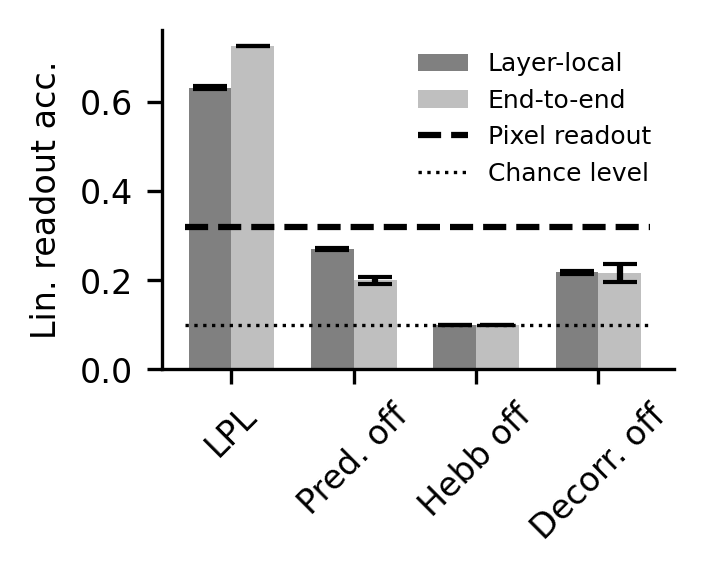

In [ ]:
plt.figure(figsize=(2.2, 1.5), dpi=300)

barWidth = 0.35

r1 = np.arange(4)
r2 = [x + barWidth for x in r1]

pixel_readout_acc = 0.32 # See notebook 3b

plt.bar(r1, [mean_accs['lpl'], mean_accs['pred_off'], mean_accs['hebb_off'], mean_accs['decorr_off']], color ='gray', width = barWidth, yerr = [err_accs['lpl'], err_accs['pred_off'], err_accs['hebb_off'], err_accs['decorr_off']], label='Layer-local', capsize=4)
plt.bar(r2, [mean_accs['lpl_e2e'], mean_accs['pred_off_e2e'], mean_accs['hebb_off_e2e'], mean_accs['decorr_off_e2e']], color ='gray', width = barWidth, yerr = [err_accs['lpl_e2e'], err_accs['pred_off_e2e'], err_accs['hebb_off_e2e'], err_accs['decorr_off_e2e']], label='End-to-end', alpha=0.5, capsize=4)
plt.xticks([r + 0.5*barWidth for r in range(len(r1))], ['LPL', 'Pred. off', 'Hebb off', 'Decorr. off'], fontsize=8)
plt.hlines(0.1, -0.2, 3.6, color='k', linewidth=0.8, linestyle='dotted', label='Chance level')
plt.hlines(pixel_readout_acc, -0.2, 3.6, color='k', linestyle='--', label='Pixel readout')
# plt.hlines(mean_accs['supervised'], -0.2, 2.6, color='k', linestyle='-.', label='Supervised')
plt.ylabel('Lin. readout acc.', fontsize=8)

handles,labels = plt.gca().get_legend_handles_labels()
handles = [handles[2], handles[3], handles[1], handles[0]]
labels = [labels[2], labels[3], labels[1], labels[0]]
lgd = plt.legend(handles, labels, frameon=False, fontsize=6)

plt.xticks(rotation=45, fontsize=8)
# plt.tight_layout()
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
sns.despine()
plt.savefig(os.path.join(outputdir,'deep_net_acc_cifar.pdf'), bbox_inches='tight')

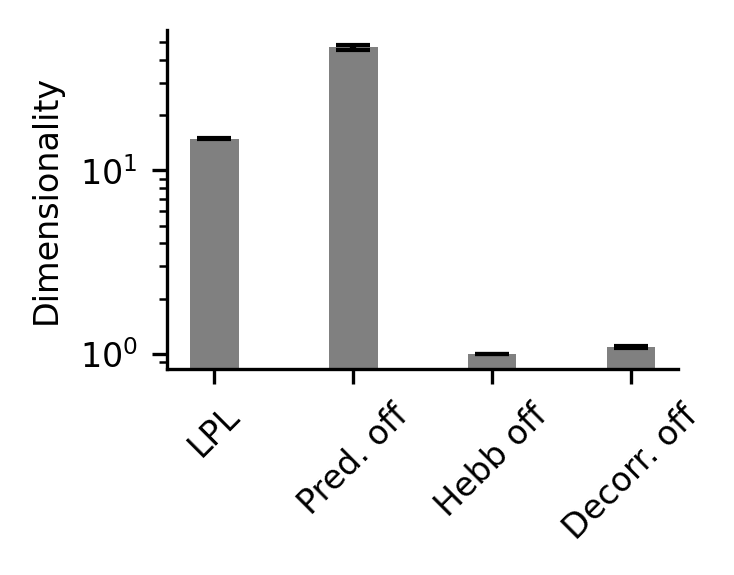

In [ ]:
plt.figure(figsize=(2.2, 1.5), dpi=300)

barWidth = 0.35

r1 = np.arange(4)
r2 = [x + barWidth for x in r1]

plt.bar(r1, [mean_dims['lpl'], mean_dims['pred_off'], mean_dims['hebb_off'], mean_dims['decorr_off']], color ='gray', width = barWidth, yerr = [err_dims['lpl'], err_dims['pred_off'], err_dims['hebb_off'], err_dims['decorr_off']], label='Layer-local', capsize=4)
plt.xticks(r1, ['LPL', 'Pred. off', 'Hebb off', 'Decorr. off'], fontsize=8)
plt.ylabel('Dimensionality', fontsize=8)
plt.xticks(rotation=45, fontsize=8)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
ax.set_yscale('log')
sns.despine()
plt.savefig(os.path.join(outputdir,'deep_net_dim_cifar.pdf'), bbox_inches='tight')

In [ ]:
mean_dims

{'lpl': 14.891985177993774,
 'lpl_e2e': 11.505983591079712,
 'pred_off': 46.77215385437012,
 'pred_off_e2e': 111.08818817138672,
 'hebb_off': 1.000000238418579,
 'hebb_off_e2e': 1.0000001788139343,
 'decorr_off': 1.0879224240779877,
 'decorr_off_e2e': 1.001764178276062,
 'supervised': 9.060387134552002,
 'supervised_e2e': 7.653300523757935,
 'neg_samples': 11.012286186218262,
 'neg_samples_e2e': 13.667211055755615,
 'no_bias': 13.4554443359375,
 'no_pooling': 3.2786386609077454,
 'no_pooling_downsampled': 13.856889963150024}

## Comparison with other methods

In [ ]:
paths_baselines = {}
model_names = {}

dims_baselines = {}
accs_baselines = {}
lens_baselines = {}

In [ ]:
paths_baselines['supervised'] = 'run_'
model_names['supervised'] = 'supervised'
paths_baselines['supervised_e2e'] = 'run_'
model_names['supervised_e2e'] = 'supervised_end-to-end'

paths_baselines['neg_samples'] = 'run_'
model_names['neg_samples'] = 'negative_samples_mlp-projection'
paths_baselines['neg_samples_e2e'] = 'run_'
model_names['neg_samples_e2e'] = 'negative_samples_mlp-projection_end-to-end'

paths_baselines['no_bias'] = 'bias_free'
# paths_baselines['stale'] = 'stale_'
paths_baselines['no_pooling'] = 'run_'

model_names['no_bias'] = 'lpl'
# model_names['stale'] = 'lpl'
model_names['no_pooling'] = 'lpl_no-pooling'

In [ ]:
for key in paths_baselines:
    accs[key] = []
    lens[key] = []
    dims[key] = []

In [ ]:
for key in paths_baselines:
    for i in range(num_runs):
        if 'downsampled' in key:
            path = os.path.join(logdir_no_pooling, paths_baselines[key] + str(i+1), model_names[key])
        elif key=='no_bias':
            path = os.path.join(logdir, paths_baselines[key], model_names[key])
        else:
            path = os.path.join(logdir, paths_baselines[key] + str(i+1), model_names[key])
        print(path)
        
        vals = get_vals_from_tensorboard(path, ACC_TAG) 
        lens[key].append(len(vals))
        accs[key].append(vals[-1])
        dims[key].append(get_vals_from_tensorboard(path, DIMENSION_TAG)[-1])

/home_fmi/01/srinmanu/data/lpl/stl10/run_1/supervised
/home_fmi/01/srinmanu/data/lpl/stl10/run_2/supervised
/home_fmi/01/srinmanu/data/lpl/stl10/run_3/supervised
/home_fmi/01/srinmanu/data/lpl/stl10/run_4/supervised
/home_fmi/01/srinmanu/data/lpl/stl10/run_1/supervised_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/run_2/supervised_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/run_3/supervised_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/run_4/supervised_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/run_1/negative_samples_mlp-projection
/home_fmi/01/srinmanu/data/lpl/stl10/run_2/negative_samples_mlp-projection
/home_fmi/01/srinmanu/data/lpl/stl10/run_3/negative_samples_mlp-projection
/home_fmi/01/srinmanu/data/lpl/stl10/run_4/negative_samples_mlp-projection
/home_fmi/01/srinmanu/data/lpl/stl10/run_1/negative_samples_mlp-projection_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/run_2/negative_samples_mlp-projection_end-to-end
/home_fmi/01/srinmanu/data/lpl/stl10/run_3/negative_

In [ ]:
for key in paths_baselines:
    print(key)
    print(np.mean(accs[key]))
    mean_accs[key] = np.mean(accs[key])
    
    if num_runs>1:
        print(np.std(accs[key]))
        err_accs[key] = np.std(accs[key])/np.sqrt(num_runs)
    else:
        err_accs[key] = 0
    
    print('')
    print(np.mean(dims[key]))
    mean_dims[key] = np.mean(dims[key])
    
    if num_runs>1:
        print(np.std(dims[key]))
        err_dims[key] = np.std(dims[key])/np.sqrt(num_runs)
    else:
        err_dims[key] = 0
    
    print('')

supervised
0.7080312371253967
0.00532195293943307

9.060387134552002
0.517850112420828

supervised_e2e
0.7781562507152557
0.005411466712514611

7.653300523757935
1.3922694221813134

neg_samples
0.7696249932050705
0.0037468665939827017

11.012286186218262
0.22930673827028283

neg_samples_e2e
0.810062512755394
0.004380795783217981

13.667211055755615
0.39856567969755224

no_bias
0.5871250033378601
0.0

13.4554443359375
0.0

no_pooling
0.29215624928474426
0.03544817356723245

3.2786386609077454
0.2449718973312198

no_pooling_downsampled
0.45250000804662704
0.008095617713064312

13.856889963150024
0.6466970762800388



In [ ]:
mean_accs

{'lpl': 0.6317500025033951,
 'lpl_e2e': 0.7251875102519989,
 'pred_off': 0.2696562558412552,
 'pred_off_e2e': 0.19984375312924385,
 'hebb_off': 0.10000000149011612,
 'hebb_off_e2e': 0.10000000149011612,
 'decorr_off': 0.21725000068545341,
 'decorr_off_e2e': 0.21568749845027924,
 'supervised': 0.7080312371253967,
 'supervised_e2e': 0.7781562507152557,
 'neg_samples': 0.7696249932050705,
 'neg_samples_e2e': 0.810062512755394,
 'no_bias': 0.5871250033378601,
 'no_pooling': 0.29215624928474426,
 'no_pooling_downsampled': 0.45250000804662704}

In [ ]:
err_accs

{'lpl': 0.0028404877600193804,
 'lpl_e2e': 0.00047083020381589796,
 'pred_off': 0.0017502091747966537,
 'pred_off_e2e': 0.00780053645621074,
 'hebb_off': 0.0,
 'hebb_off_e2e': 0.0,
 'decorr_off': 0.004066826307641573,
 'decorr_off_e2e': 0.020741360525664797,
 'supervised': 0.002660976469716535,
 'supervised_e2e': 0.0027057333562573054,
 'neg_samples': 0.0018734332969913509,
 'neg_samples_e2e': 0.0021903978916089904,
 'no_bias': 0.0,
 'no_pooling': 0.017724086783616224,
 'no_pooling_downsampled': 0.004047808856532156}